# Gun Violence

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from statsmodels.graphics.gofplots import qqplot
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import pylab
#from sklearn import linear_model
sns.set(style="whitegrid",context="talk")
sns.set(rc={'figure.figsize':(41.7,38.27)})
%matplotlib inline

pd.set_option('display.max_rows', 20)
gun_viol = pd.read_csv('/home/gabi/DSP19/DSP19_Course/gun-violence-data/gun-violence-data_01-2013_03-2018.csv', sep=",")


In [4]:
gun_viol.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [5]:
gun_viol.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [6]:
gun_viol.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
                                ...   
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type                object
sources                         object
state_house_district           float64
state_senate_district          float64
Length: 29, dtype: object

In [7]:
gun_viol.index

RangeIndex(start=0, stop=239677, step=1)

In [8]:
#Filtering the columns
df_gun = gun_viol[['date', 'state', 'city_or_county', 'n_killed', 'n_injured','gun_type', 'incident_characteristics', 'participant_age', 'participant_gender', 'participant_status',   'participant_type' ]]
df_gun

,date,state,city_or_county,n_killed,n_injured,gun_type,incident_characteristics,participant_age,participant_gender,participant_status,participant_type
0,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,0::20,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,2013-01-01,California,Hawthorne,1,3,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::20,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,2013-01-05,Colorado,Aurora,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,2013-01-07,North Carolina,Greensboro,2,2,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
5,2013-01-07,Oklahoma,Tulsa,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Hom...",0::23||1::23||2::33||3::55,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
6,2013-01-19,New Mexico,Albuquerque,5,0,0::22 LR||1::223 Rem [AR-15],"Shot - Dead (murder, accidental, suicide)||Mas...",0::51||1::40||2::9||3::5||4::2||5::15,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
7,2013-01-21,Louisiana,New Orleans,0,5,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
8,2013-01-21,California,Brentwood,0,4,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
9,2013-01-23,Maryland,Baltimore,1,6,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::15,0::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...


In [43]:
#Creating a new column Total people
df_gun['total_people'] = df_gun['n_killed'] + df_gun['n_injured']
df_gun


/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,state,city_or_county,n_killed,n_injured,gun_type,incident_characteristics,participant_age,participant_gender,participant_status,participant_type,total_crime,year,month,total_people
0,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,0::20,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,2013,01,4
1,2013-01-01,California,Hawthorne,1,3,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::20,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,2013,01,4
2,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,4,2013,01,4
3,2013-01-05,Colorado,Aurora,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4,2013,01,4
4,2013-01-07,North Carolina,Greensboro,2,2,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4,2013,01,4
5,2013-01-07,Oklahoma,Tulsa,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Hom...",0::23||1::23||2::33||3::55,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,2013,01,4
6,2013-01-19,New Mexico,Albuquerque,5,0,0::22 LR||1::223 Rem [AR-15],"Shot - Dead (murder, accidental, suicide)||Mas...",0::51||1::40||2::9||3::5||4::2||5::15,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,5,2013,01,5
7,2013-01-21,Louisiana,New Orleans,0,5,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,5,2013,01,5
8,2013-01-21,California,Brentwood,0,4,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,2013,01,4
9,2013-01-23,Maryland,Baltimore,1,6,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::15,0::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,7,2013,01,7


In [45]:
df_gun.columns

Index(['date', 'state', 'city_or_county', 'n_killed', 'n_injured', 'gun_type',
       'incident_characteristics', 'participant_age', 'participant_gender',
       'participant_status', 'participant_type', 'total_crime', 'year',
       'month', 'total_people'],
      dtype='object')

In [11]:
#Split the date column

# y_m_d = df_gun['date'].str.split('-', expand=True)
#y_m_d



In [159]:
#add year and month in dataframe 
# df_gun['year'] = y_m_d[0]
# df_gun['month'] = y_m_d[1]
# df_gun.columns

df_gun_final['year'] = pd.DatetimeIndex(df_gun['date']).year
df_gun_final['month'] = pd.DatetimeIndex(df_gun['date']).month
#df_gun_final['day'] = pd.DatetimeIndex(df_gun['date']).day
df_gun_final.head()

/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,date,year,month,state,city_or_county,n_killed,n_injured,total_people,gun_type,incident_characteristics,participant_age,participant_gender,participant_status,participant_type,day
0,2013-01-01,2013,1,Pennsylvania,Mckeesport,0,4,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,0::20,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,1
1,2013-01-01,2013,1,California,Hawthorne,1,3,4,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::20,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,1
2,2013-01-01,2013,1,Ohio,Lorain,1,3,4,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,1
3,2013-01-05,2013,1,Colorado,Aurora,4,0,4,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,5
4,2013-01-07,2013,1,North Carolina,Greensboro,2,2,4,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,7


In [129]:
# df_gun_final = df_gun[['date', 'year', 'month', 'state', 'city_or_county', 'n_killed', 'n_injured', 'total_crime', 'gun_type',
#        'incident_characteristics', 'participant_age', 'participant_gender','participant_status', 'participant_type']]
# df_gun_final.head()

df_gun_final = df_gun[['date', 'year', 'month', 'state', 'city_or_county', 'n_killed', 'n_injured', 'total_people', 'gun_type',
       'incident_characteristics', 'participant_age', 'participant_gender','participant_status', 'participant_type']]
df_gun_final.head()


,date,year,month,state,city_or_county,n_killed,n_injured,total_people,gun_type,incident_characteristics,participant_age,participant_gender,participant_status,participant_type
0,2013-01-01,2013,1,Pennsylvania,Mckeesport,0,4,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,0::20,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,2013-01-01,2013,1,California,Hawthorne,1,3,4,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::20,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,2013-01-01,2013,1,Ohio,Lorain,1,3,4,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,2013-01-05,2013,1,Colorado,Aurora,4,0,4,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,2013-01-07,2013,1,North Carolina,Greensboro,2,2,4,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...


In [141]:
#FLAVIA DATA FRAME KILLED per states

df_killed = df_gun_final.groupby(['year','state'])['n_killed'].sum().reset_index()
#df_killed['n_killed'].sum()
df_killed.head()

,year,state,n_killed
0,2013,Alabama,3
1,2013,Arizona,8
2,2013,California,46
3,2013,Colorado,4
4,2013,Connecticut,2


In [142]:
#Somando o número de mortos por ano, mês e estado no df. FLAVIA

df_killed_month = df_gun_final.groupby(['year','month','state'])['n_killed'].sum().reset_index()

#df_killed_month.head()
df_killed_month['n_killed'].sum()
df_killed_month

,year,month,state,n_killed
0,2013,1,California,1
1,2013,1,Colorado,4
2,2013,1,District of Columbia,0
3,2013,1,Louisiana,2
4,2013,1,Maryland,1
5,2013,1,Missouri,1
6,2013,1,New Mexico,5
7,2013,1,North Carolina,2
8,2013,1,Ohio,2
9,2013,1,Oklahoma,4


In [143]:
#Sorted states by killed sum in all years FLAVIA

total_K_state = df_gun_final.groupby(['state'])['n_killed'].sum().reset_index()
total_K_state = total_K_state.sort_values(['n_killed'], ascending=False)
total_K_state.head()

,state,n_killed
4,California,5562
43,Texas,5046
9,Florida,3909
13,Illinois,3409
35,Ohio,2508


Text(-0.3100000000000023, 0.5, 'n_killed')

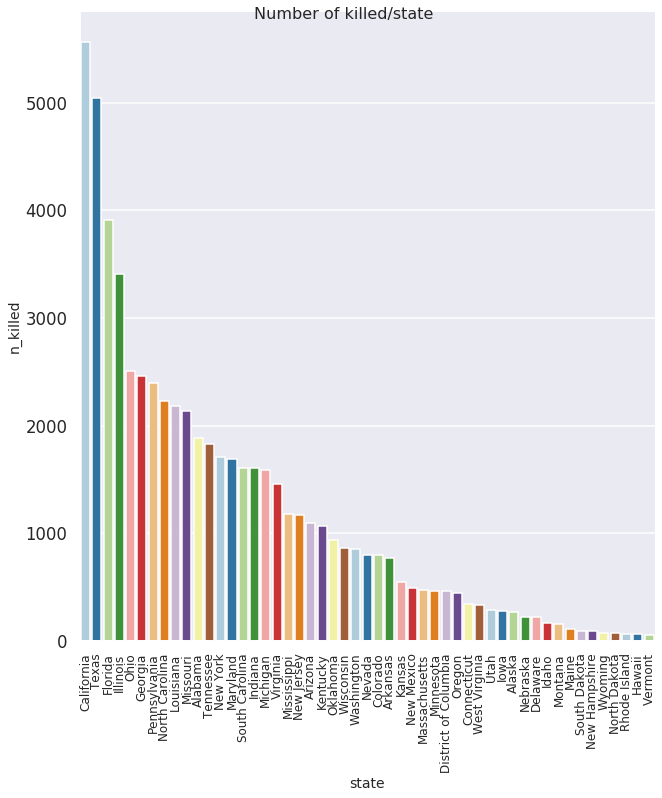

In [133]:
#FLAVIA number killed per state all years

graf=sns.catplot(x='state',y='n_killed', kind='bar', data=total_K_state, height=10, palette='Paired').set_xticklabels(rotation=90)
(graf.fig.suptitle('Number of killed/state', fontsize=16))

plt.xticks(fontsize=12)
plt.xlabel("state", fontsize=14)
plt.ylabel("n_killed", fontsize=14)

In [144]:
#Somando o número de mortos por cidade no df. 

df_killed_city = df_gun_final.groupby(['city_or_county'])['n_killed'].sum().reset_index()
df_killed_city = df_killed_city.sort_values(['n_killed'], ascending=False)
#df_killed['n_killed'].sum()
df_killed_city.head()

,city_or_county,n_killed
2019,Chicago,2104
5303,Houston,1145
530,Baltimore,1055
10152,Saint Louis,919
9018,Philadelphia,901


Text(0.5, 0.98, 'Number of killed/city_or_county: TOP 10')

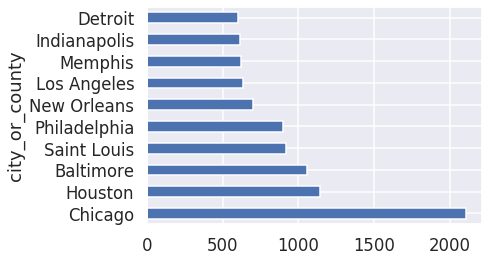

In [135]:
#FLAVIA graph TOP 10 most dangerous cities in all years in USA - killed people in all years 

df_killed_city.groupby(['city_or_county'])['n_killed'].sum().nlargest(10).plot(kind='barh')
(graf.fig.suptitle('Number of killed/city_or_county: TOP 10'))

In [145]:
#FLAVIA  - 
#Somando e ordenando número de mortos por meses.

df_kill_month = df_gun_final.groupby(['month'])['n_killed'].sum().reset_index()
df_kill_month = df_kill_month.sort_values(['month'])
df_kill_month


,month,n_killed
0,1,6035
1,2,4945
2,3,5641
3,4,4383
4,5,4830
5,6,4886
6,7,5276
7,8,5127
8,9,4779
9,10,4791


In [138]:
# FLAVIA substituindo os números pelos nomes dos meses do ano

count = 1
months = ['Jan', 'Feb', 'Mar', 'Aph', 'May', 'Jun', 'Jul','Aug', 'Sep','Oct','Nov', 'Dec']

for i in months:
    df_kill_month = df_kill_month.replace(count,i)
    count +=1
df_kill_month.head()

,month,n_killed
0,Jan,6035
1,Feb,4945
2,Mar,5641
3,Aph,4383
4,May,4830


Text(-0.30999999999999517, 0.5, 'n_killed')

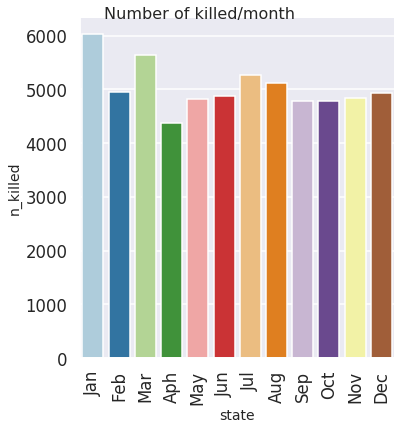

In [139]:
# FLAVIA Gráfico demonstrando o número de mortos por estados

graf=sns.catplot(x='month',y='n_killed', kind='bar', data=df_kill_month, height=6, palette='Paired').set_xticklabels(rotation=90)
(graf.fig.suptitle('Number of killed/month', fontsize=16))

plt.xlabel("state", fontsize=14)
plt.ylabel("n_killed", fontsize=14)

In [149]:
# FLAVIA somando o número total de mortos por ano

total_K_state = df_gun_final.groupby(['year'])['n_killed'].sum().reset_index()
total_K_state.sort_values(['n_killed'], ascending=False)

,year,n_killed
4,2017,15511
3,2016,15066
2,2015,13484
1,2014,12557
5,2018,3533
0,2013,317


Text(0.5, 0.98, 'Number of killed/year')

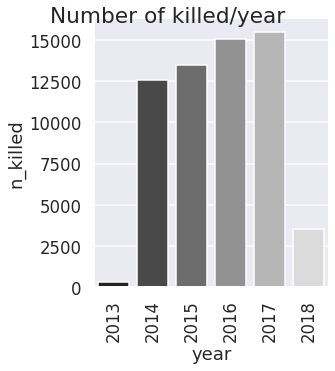

In [150]:
#FLAVIA Gráfico gerado a partir do número de mortos por ano.

graf=sns.catplot(x='year',y='n_killed', kind='bar', data=total_K_state, palette='gray').set_xticklabels(rotation=90)
(graf.fig.suptitle('Number of killed/year'))

In [ ]:
#FIM FLAVIA

In [160]:
#sum of all crimes per year 

groupby_year = df_gun_final.groupby(['year'])['total_people'].sum().reset_index()

groupby_year_sorted = groupby_year.sort_values(['total_people'], ascending = False)
groupby_year_sorted

##2018 - just have three months data. However, its level of gun violence is higher than 2013!!!!! #almost 8 times

,year,total_people
4,2017,46214
3,2016,45646
2,2015,40451
1,2014,35559
5,2018,9704
0,2013,1296


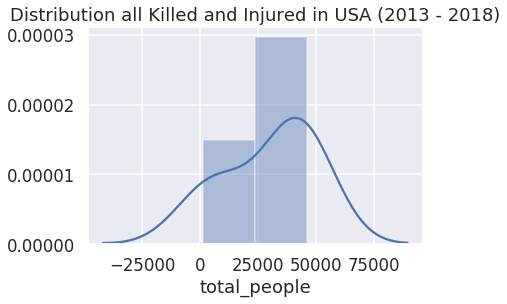

In [108]:
#Fit distribution all crimes during 2013-2018

plt.title('Distribution all Killed and Injured in USA (2013 - 2018)')
sns.set_context('talk')
sns.distplot(groupby_year['total_people'])

plt.show()


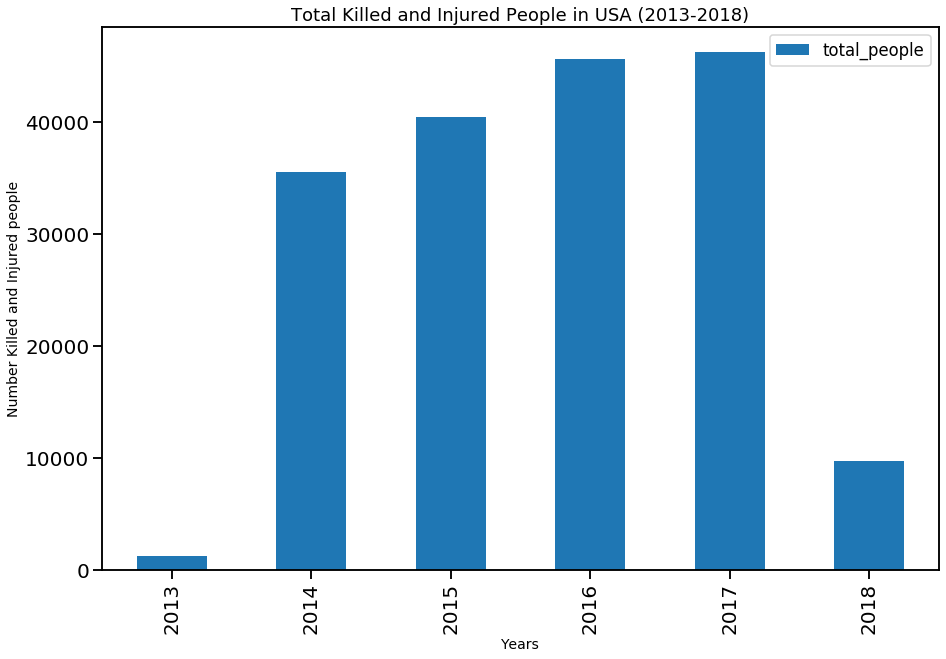

In [49]:
ax = groupby_year[['total_people']].plot(kind='bar', title ="Total Killed and Injured People in USA (2013-2018)", figsize=(15, 10), legend=True, fontsize=20)
ax.set_xlabel("Years", fontsize=14)
ax.set_ylabel("Number Killed and Injured people", fontsize=14)
plt.xticks(groupby_year.index,groupby_year["year"].values)
plt.show()

# ANALYSIS YEAR & MONTHS

In [50]:
#sum of all crimes per year and month   
group_year_month = df_gun.groupby(['year', 'month'])['total_people'].sum().reset_index()
group_year_month

# group_year_month_sorted = group_year_month.sort_values(['total_crime'], ascending = False) 
# group_year_month_sorted

,year,month,total_people
0,2013,01,67
1,2013,02,59
2,2013,03,100
3,2013,04,78
4,2013,05,121
5,2013,06,156
6,2013,07,142
7,2013,08,119
8,2013,09,147
9,2013,10,107


In [51]:
#Check zeros in grouped dataframe
group_year_month == 0


,year,month,total_people
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [52]:
group_year_month.groupby('year').describe()

total_people                                                             \
            count         mean         std     min      25%     50%      75%   
year                                                                           
2013         12.0   108.000000   31.389054    59.0    84.00   110.5   126.25   
2014         12.0  2963.250000  399.872508  2068.0  2827.00  2968.5  3196.75   
2015         12.0  3370.916667  474.979513  2248.0  3173.25  3409.5  3715.00   
2016         12.0  3803.833333  454.065641  2848.0  3565.25  3825.0  4044.50   
2017         12.0  3851.166667  320.089429  3338.0  3625.00  3919.5  4049.00   
2018          3.0  3234.666667  442.974416  2804.0  3007.50  3211.0  3450.00   

              
         max  
year          
2013   156.0  
2014  3585.0  
2015  3962.0  
2016  4461.0  
2017  4409.0  
2018  3689.0

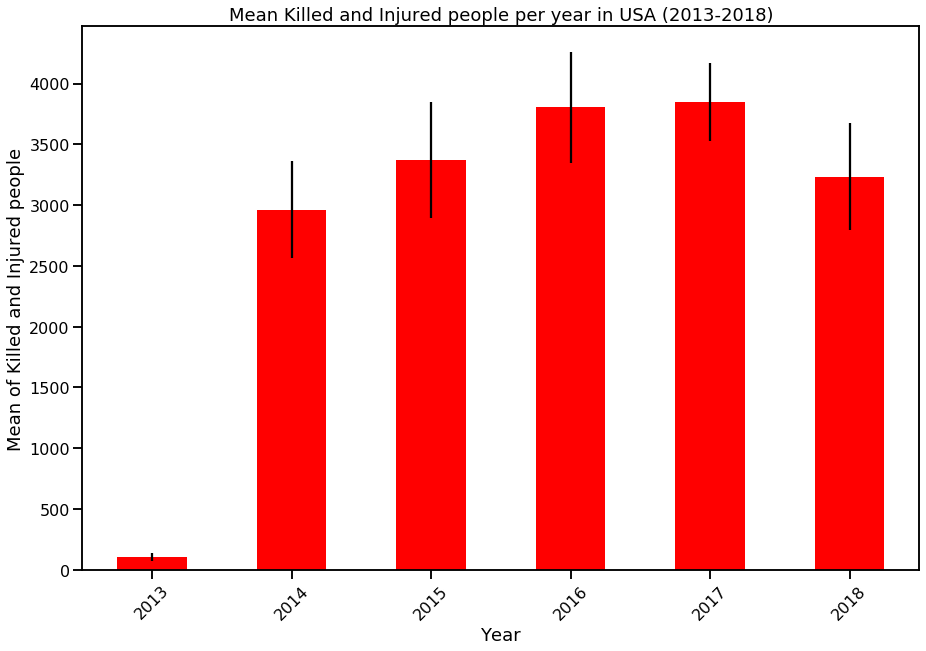

In [53]:
#Plot Mean and std per year
mean_crimes = group_year_month.groupby('year').mean()
std_crimes = group_year_month.groupby('year').std()

mean_std_plot_y = mean_crimes.plot(kind='bar', figsize=(15,10),legend=False,rot=45,color="red",fontsize=16,yerr=std_crimes);
mean_std_plot_y.set_title("Mean Killed and Injured people per year in USA (2013-2018)", fontsize=18);
mean_std_plot_y.set_xlabel("Year", fontsize=18);
mean_std_plot_y.set_ylabel("Mean of Killed and Injured people", fontsize=18);
plt.show()
#We can observe that 2013 and 2018 are "outliers"


In [54]:
#Filtering 2013 and 2018 data
group_y_m_filter = group_year_month[12:60].reset_index()
group_y_m_filter


,index,year,month,total_people
0,12,2014,01,2945
1,13,2014,02,2068
2,14,2014,03,2558
3,15,2014,04,2761
4,16,2014,05,3199
5,17,2014,06,3196
6,18,2014,07,3585
7,19,2014,08,3438
8,20,2014,09,3072
9,21,2014,10,2896


In [55]:
#Testing normality of total killed and injured data
stats.shapiro(group_year_month['total_people']) #not normal as expected


(0.7705092430114746, 1.5148559739941447e-08)

In [56]:
#Testing normality of filtered crime data
stats.shapiro(group_y_m_filter['total_people']) #normal distribution


(0.9758527874946594, 0.41982579231262207)

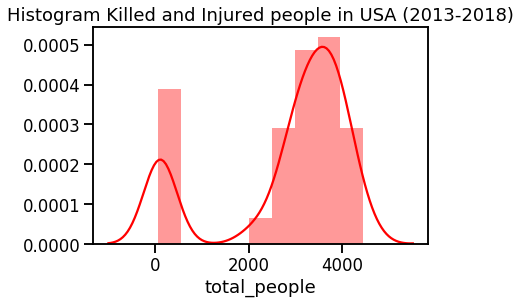

In [60]:
#HISTOGRAM ALL DATA
#group_year_month['total_people'].plot(kind='hist', figsize=[12,6], legend=True)

sns.distplot(group_year_month['total_people'], color='red')
plt.title('Histogram Killed and Injured people in USA (2013-2018)')
plt.show()


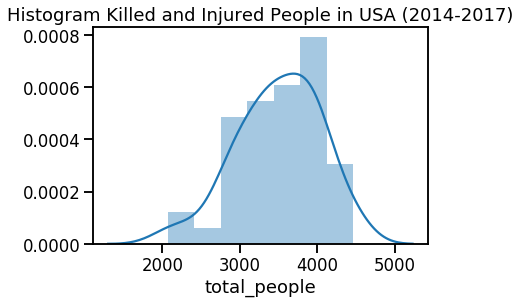

In [58]:
#HISTOGRAM FILTERED DATA
#group_y_m_filter['total_crime'].plot(kind='hist', color='green', figsize=[12,6], legend=True)
plt.title('Histogram Killed and Injured People in USA (2014-2017)')
sns.set_context('talk')
sns.distplot(group_y_m_filter['total_people'])

plt.show()


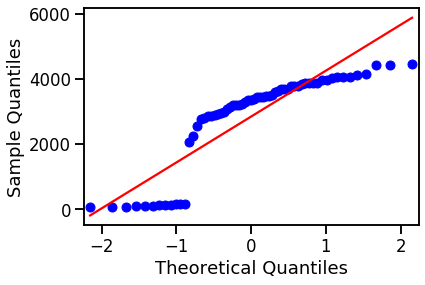

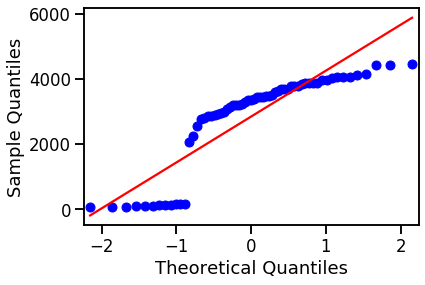

In [64]:
#qqplot non filtered data
sm.qqplot(group_year_month['total_people'], line='s')



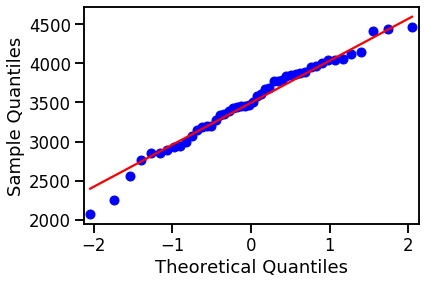

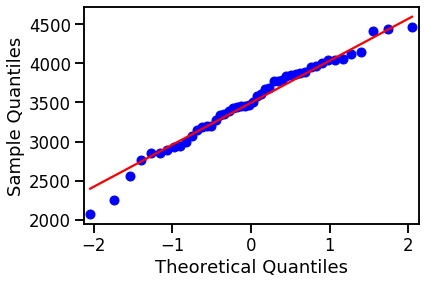

In [63]:
#qqplot filtered data
sm.qqplot(group_y_m_filter['total_people'], line='s')


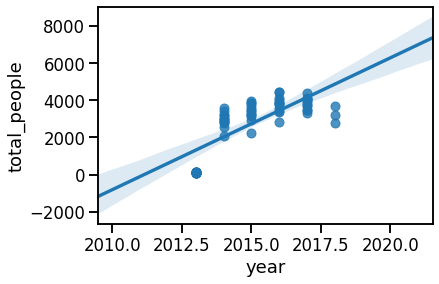

In [62]:
#All Killed and Injured data linear - regression

#Check the types
group_year_month.dtypes
#Change the type of year from object to numeric
group_year_month['year'] = group_year_month['year'].astype(int)
group_year_month.dtypes
#Ploting linear regression without 2018 data
sns.regplot(x="year", y="total_people", data=group_year_month)





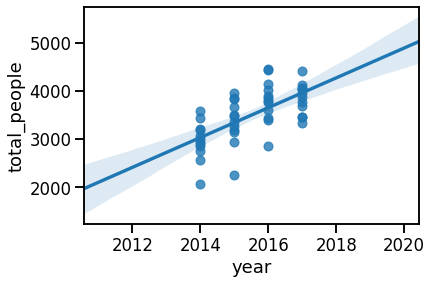

In [67]:
#Filtered 2013 and 2018 Killed and Injured data - linear regression
group_y_m_filter['year'] = group_y_m_filter['year'].astype(int)
sns.regplot(x="year", y="total_people", data=group_y_m_filter)

In [68]:
#Fitting model filtered data 
X = group_y_m_filter['year']
y = group_y_m_filter['total_people']
# Note the difference in argument order
model = sm.OLS(y, X).fit() #OLS stands for Ordinary Least Squares and the method “Least Squares” means that
#we’re trying to fit a regression line that would minimize the square of distance from the regression line
predictions = model.predict(y) # make the predictions by the model
# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_people   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              1997.
Date:                Tue, 06 Aug 2019   Prob (F-statistic):                    3.66e-40
Time:                        11:05:00   Log-Likelihood:                         -369.79
No. Observations:                  48   AIC:                                      741.6
Df Residuals:                      47   BIC:                                      743.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           1.7353      0.039     44.693      0.000       1.657       1.813
==============================================================================
Omnibus:                        2.044   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.671
Skew:                          -0.456   Prob(JB):                        0.434
Kurtosis:                       2.927   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#ALERT!!!!
#Fitting model all data (if you press the button, test will run)
X = group_year_month['year']
y = group_year_month['total_people']
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(y) # make the predictions by the model
# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_people   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                              252.5
Date:                Tue, 06 Aug 2019   Prob (F-statistic):                    1.54e-23
Time:                        11:04:20   Log-Likelihood:                         -546.10
No. Observations:                  63   AIC:                                      1094.
Df Residuals:                      62   BIC:                                      1096.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           1.4093      0.089     15.891      0.000       1.232       1.587
==============================================================================
Omnibus:                       12.304   Durbin-Watson:                   0.131
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.426
Skew:                          -1.171   Prob(JB):                     0.000737
Kurtosis:                       2.887   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

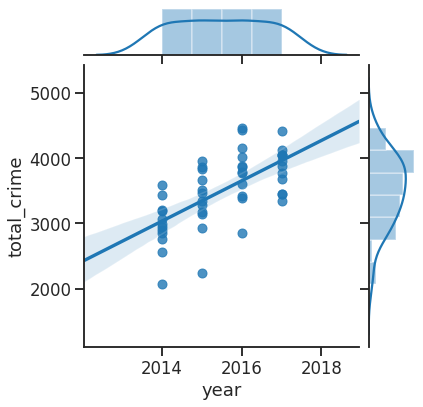

In [172]:
#Ploting linear regression and data distribution filtered data 2013 - 2018
sns.jointplot(x="year", y="total_crime", data=group_y_m_filter, kind="reg")


# # MONTHS



In [139]:
#sum of all crimes per year and month   
group_year_month = df_gun.groupby(['year', 'month'])['total_crime'].sum().reset_index()
group_year_month

# group_year_month_sorted = group_year_month.sort_values(['total_crime'], ascending = False)
# group_year_month_sorted

,year,month,total_crime
0,2013,01,67
1,2013,02,59
2,2013,03,100
3,2013,04,78
4,2013,05,121
5,2013,06,156
6,2013,07,142
7,2013,08,119
8,2013,09,147
9,2013,10,107


In [140]:
#Months with more Killed and Injured people without 2013 and 2018
df_month_max = group_year_month.loc[group_year_month.groupby(['year'])['total_crime'].idxmax()]
x = df_month_max.reset_index()

#Excluding 2013 and 2018
df_month_filter = x[1:5]
df_month_filter


,index,year,month,total_crime
1,18,2014,07,3585
2,30,2015,07,3962
3,43,2016,08,4461
4,54,2017,07,4409


In [141]:
#Filtering the complete dataframe 2013 and 2018

df_no13_no18 = df_gun_final[(df_gun.year != '2013') & (df_gun.year != '2018')]
df_no13_no18


,date,year,month,state,city_or_county,n_killed,n_injured,total_crime,gun_type,incident_characteristics,participant_age,participant_gender,participant_status,participant_type
278,2014-01-01,2014,01,Michigan,Muskegon,0,0,0,NaN,Shots Fired - No Injuries,NaN,0::Female,0::Unharmed,0::Victim
279,2014-01-01,2014,01,New Jersey,Newark,0,0,0,NaN,Officer Involved Incident,NaN,NaN,NaN,NaN
280,2014-01-01,2014,01,New York,Queens,1,0,1,NaN,"Shot - Dead (murder, accidental, suicide)",0::22||1::26,0::Male||1::Male,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect
281,2014-01-01,2014,01,New York,Brooklyn,0,1,1,NaN,Shot - Wounded/Injured,0::34,0::Male||1::Male,0::Injured,0::Victim||1::Subject-Suspect
282,2014-01-01,2014,01,Missouri,Springfield,0,1,1,NaN,Shot - Wounded/Injured,0::6||1::12,0::Female,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect
283,2014-01-01,2014,01,Georgia,Columbus,0,1,1,NaN,Shot - Wounded/Injured,0::27||1::25,0::Male||1::Male,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect
284,2014-01-01,2014,01,New York,Syracuse,0,1,1,NaN,Shot - Wounded/Injured,0::20,0::Male,0::Injured,0::Victim
285,2014-01-01,2014,01,Kentucky,Lexington,0,0,0,NaN,Shots Fired - No Injuries||Drive-by (car to st...,NaN,NaN,NaN,NaN
286,2014-01-01,2014,01,Georgia,Bibb County,0,1,1,NaN,Shot - Wounded/Injured,0::24||1::35,0::Male||1::Male,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect
287,2014-01-01,2014,01,Virginia,Prince William County,0,1,1,NaN,Shot - Wounded/Injured,0::31||1::25,0::Male||1::Male,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect


In [143]:
#Sum Killed and Injured data per month without 2013 and 2018

group_month_filtered = df_no13_no18.groupby(['month'])['total_crime'].sum().reset_index()
group_month_filtered


,month,total_crime
0,01,13225
1,02,10502
2,03,12805
3,04,13212
4,05,14953
5,06,14527
6,07,16393
7,08,15817
8,09,14398
9,10,14440


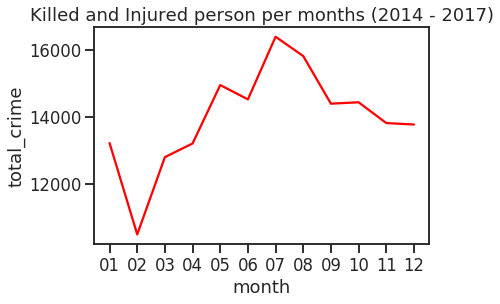

In [167]:
#Killed and Injured data per month

plt.title('Killed and Injured person per months (2014 - 2017)')
sns.set_style('ticks')
sns.set_context('talk')
sns.lineplot(x="month", y="total_crime", color='red', data=group_month_filtered)



# STATES


In [69]:
group_year_state = df_gun_final.groupby(['state'])['total_people'].sum().reset_index()
df_sorted_state = group_year_state.sort_values(['total_people'], ascending = False)
df_sorted_state


,state,total_people
13,Illinois,16923
4,California,13206
43,Texas,11152
9,Florida,10981
35,Ohio,8211
38,Pennsylvania,7451
33,North Carolina,6854
32,New York,6764
18,Louisiana,6577
10,Georgia,6512


In [146]:
#Calculating total number of crimes
total_crime_values = group_year_state['total_crime'].sum()
total_crime_values


178870

In [70]:
#Calculating the percentage of killed and injured people per state englobing sum of all years (2014-2017)
df_sorted_state['perc'] = df_sorted_state['total_people']/178870
df_perc_sorted = df_sorted_state.reset_index()
df_perc_sorted['perc_100'] = df_perc_sorted['perc']*100
df_perc_sorted


,index,state,total_people,perc,perc_100
0,13,Illinois,16923,0.094611,9.461061
1,4,California,13206,0.073830,7.383016
2,43,Texas,11152,0.062347,6.234696
3,9,Florida,10981,0.061391,6.139095
4,35,Ohio,8211,0.045905,4.590485
5,38,Pennsylvania,7451,0.041656,4.165595
6,33,North Carolina,6854,0.038318,3.831833
7,32,New York,6764,0.037815,3.781517
8,18,Louisiana,6577,0.036770,3.676972
9,10,Georgia,6512,0.036406,3.640633


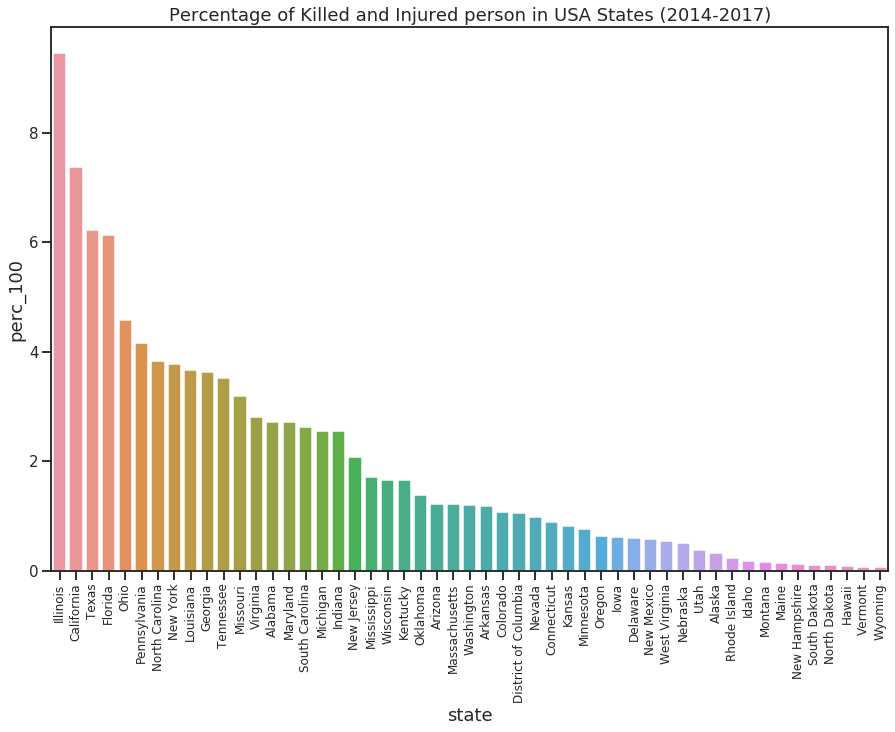

In [166]:
#Plot percentage of Killed and Injured data (2014-2017) per state
plt.figure(figsize=(15,10))
plt.title('Percentage of Killed and Injured person in USA States (2014-2017)')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=15)

sns.barplot(x='state', y='perc_100', data=df_perc_sorted)

plt.show()


In [71]:
#Creating lists of Top 10 states most dangerous per year

group_y_s_venn = df_gun_final.groupby(['year', 'state'])['total_people'].sum().reset_index()


df_2014_top10 = group_y_s_venn[group_y_s_venn['year'].str.contains("2014")].nlargest(10, 'total_people')
list_state_2014 = df_2014_top10.reset_index()
list_state_2014

df_2015_top10 = group_y_s_venn[group_y_s_venn['year'].str.contains("2015")].nlargest(10, 'total_people')
list_state_2015 = df_2015_top10.reset_index()
list_state_2015

df_2016_top10 = group_y_s_venn[group_y_s_venn['year'].str.contains("2016")].nlargest(10, 'total_people')
list_state_2016 = df_2016_top10.reset_index()
list_state_2016

df_2017_top10 = group_y_s_venn[group_y_s_venn['year'].str.contains("2017")].nlargest(10, 'total_people')
list_state_2017 = df_2017_top10.reset_index()
list_state_2017



,index,year,state,total_people
0,203,2017,Illinois,4588
1,194,2017,California,3376
2,199,2017,Florida,2751
3,233,2017,Texas,2734
4,225,2017,Ohio,2217
5,228,2017,Pennsylvania,1823
6,208,2017,Louisiana,1733
7,200,2017,Georgia,1715
8,223,2017,North Carolina,1709
9,232,2017,Tennessee,1693


In [151]:
#Add all top 10 state with more Killed and Injured data per year to unique list
list_of_years_states = [list_state_2014, list_state_2015, list_state_2016, list_state_2017]
list_of_years_states

[   index  year           state  total_crime
 0     41  2014      California         2927
 1     50  2014        Illinois         2913
 2     46  2014         Florida         2336
 3     80  2014           Texas         2251
 4     75  2014    Pennsylvania         1835
 5     72  2014            Ohio         1614
 6     55  2014       Louisiana         1386
 7     70  2014  North Carolina         1371
 8     69  2014        New York         1362
 9     47  2014         Georgia         1339,
    index  year           state  total_crime
 0    101  2015        Illinois         3510
 1     92  2015      California         2821
 2    131  2015           Texas         2491
 3     97  2015         Florida         2343
 4    120  2015        New York         1984
 5    123  2015            Ohio         1841
 6     98  2015         Georgia         1691
 7    121  2015  North Carolina         1589
 8    126  2015    Pennsylvania         1572
 9    130  2015       Tennessee         1416,
    inde

In [152]:
#Creating a merged data frame of top 10 states with most Killed and Injured people

def intersect_recursive(list_of_years_states, how):
    
    if len(list_of_years_states) == 1:
        return list_of_years_states[0]
    
    else:
        head = list_of_years_states[0]
        smaller_list = list_of_years_states[1:]
        return pd.merge(head, intersect_recursive(smaller_list, how), how=how, on=['state'])


df_state_merge = intersect_recursive(list_of_years_states, 'outer')
df_state_merge.head()

,index_x,year_x,state,total_crime_x,index_y,year_y,total_crime_y,index_x,year_x,total_crime_x,index_y,year_y,total_crime_y
0,41.0,2014,California,2927.0,92.0,2015,2821.0,143.0,2016,3161.0,194.0,2017,3376.0
1,50.0,2014,Illinois,2913.0,101.0,2015,3510.0,152.0,2016,5083.0,203.0,2017,4588.0
2,46.0,2014,Florida,2336.0,97.0,2015,2343.0,148.0,2016,2847.0,199.0,2017,2751.0
3,80.0,2014,Texas,2251.0,131.0,2015,2491.0,182.0,2016,2927.0,233.0,2017,2734.0
4,75.0,2014,Pennsylvania,1835.0,126.0,2015,1572.0,177.0,2016,1776.0,228.0,2017,1823.0


In [89]:
#Rename columns state merge

df_state_merge.columns = ['index_2014','year_2014','state',
                     'total_crime_14','index_2015', 'year_2015',
                     'total_crime_15', 'index_2016','year_2016',
                     'total_crime_16', 'index_2017','year_2017',
                     'total_crime_17']

df_state_merge


,index_2014,year_2014,state,total_crime_14,index_2015,year_2015,total_crime_15,index_2016,year_2016,total_crime_16,index_2017,year_2017,total_crime_17
0,48.0,2014,Hawaii,21.0,99.0,2015,39.0,150.0,2016,51.0,201.0,2017,28.0
1,87.0,2014,Wyoming,27.0,138.0,2015,36.0,189.0,2016,30.0,240.0,2017,22.0
2,78.0,2014,South Dakota,36.0,129.0,2015,53.0,180.0,2016,55.0,231.0,2017,40.0
3,71.0,2014,North Dakota,39.0,122.0,2015,51.0,173.0,2016,51.0,224.0,2017,48.0
4,56.0,2014,Maine,47.0,107.0,2015,62.0,158.0,2016,55.0,209.0,2017,69.0
5,82.0,2014,Vermont,47.0,133.0,2015,33.0,184.0,2016,23.0,235.0,2017,20.0
6,49.0,2014,Idaho,57.0,100.0,2015,76.0,151.0,2016,78.0,202.0,2017,81.0
7,66.0,2014,New Hampshire,60.0,117.0,2015,48.0,168.0,2016,60.0,219.0,2017,53.0
8,63.0,2014,Montana,62.0,114.0,2015,72.0,165.0,2016,64.0,216.0,2017,74.0
9,38.0,2014,Alaska,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#list_of_years_states

In [85]:
#Data of state to list

list_state_2014['state'].values.tolist()
list_state_2015['state'].values.tolist()
list_state_2016['state'].values.tolist()
list_state_2017['state'].values.tolist()



['Illinois',
 'California',
 'Florida',
 'Texas',
 'Ohio',
 'Pennsylvania',
 'Louisiana',
 'Georgia',
 'North Carolina',
 'Tennessee']

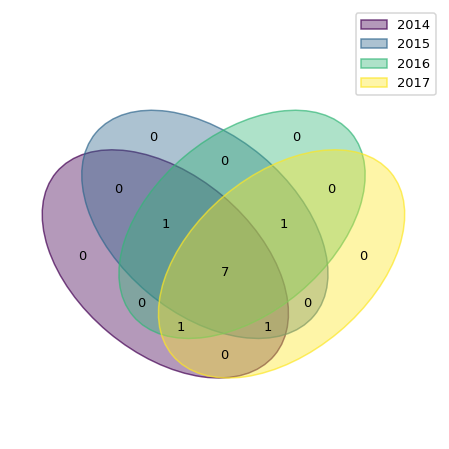

In [94]:
#venn top 10 most dangerous states in USA

from venn import venn
%matplotlib inline

states = {
    "2014": {'California',
 'Illinois',
 'Florida',
 'Texas',
 'Pennsylvania',
 'Ohio',
 'Louisiana',
 'North Carolina',
 'New York',
 'Georgia'},
    "2015": {'Illinois',
 'California',
 'Texas',
 'Florida',
 'New York',
 'Ohio',
 'Georgia',
 'North Carolina',
 'Pennsylvania',
 'Tennessee'},
    "2016": {'Illinois',
 'California',
 'Texas',
 'Florida',
 'Ohio',
 'North Carolina',
 'Pennsylvania',
 'New York',
 'Tennessee',
 'Louisiana'},
    "2017": {'Illinois',
 'California',
 'Florida',
 'Texas',
 'Ohio',
 'Pennsylvania',
 'Louisiana',
 'Georgia',
 'North Carolina',
 'Tennessee'}
}

venn(states)

In [ ]:
#Sorting to obtain the top 10 states with lower Killed and Injured data

In [74]:
#Creating lists of Top 10 states lowest dangerous per year CHANGE TO TOP LOWER

group_y_s_venn = df_gun_final.groupby(['year', 'state'])['total_people'].sum().reset_index()


df_2014_top10_lower = group_y_s_venn[group_y_s_venn['year'].str.contains("2014")].nsmallest(10, 'total_people')
list_state_2014_lower = df_2014_top10_lower.reset_index()
list_state_2014_lower

df_2015_top10_lower = group_y_s_venn[group_y_s_venn['year'].str.contains("2015")].nsmallest(10, 'total_people')
list_state_2015_lower = df_2015_top10_lower.reset_index()
list_state_2015_lower

df_2016_top10_lower = group_y_s_venn[group_y_s_venn['year'].str.contains("2016")].nsmallest(10, 'total_people')
list_state_2016_lower = df_2016_top10_lower.reset_index()
list_state_2016_lower

df_2017_top10_lower = group_y_s_venn[group_y_s_venn['year'].str.contains("2017")].nsmallest(10, 'total_people')
list_state_2017_lower = df_2017_top10_lower.reset_index()
list_state_2017_lower



,index,year,state,total_people
0,235,2017,Vermont,20
1,240,2017,Wyoming,22
2,201,2017,Hawaii,28
3,231,2017,South Dakota,40
4,224,2017,North Dakota,48
5,219,2017,New Hampshire,53
6,209,2017,Maine,69
7,216,2017,Montana,74
8,202,2017,Idaho,81
9,229,2017,Rhode Island,90


In [76]:
list_of_years_states_lower = [list_state_2014_lower, list_state_2015_lower, list_state_2016_lower, list_state_2017_lower]

In [87]:
#Creating a merged data frame of top 10 states with most Killed and Injured people

def intersect_recursive(list_of_years_states_lower, how):
    
    if len(list_of_years_states_lower) == 1:
        return list_of_years_states_lower[0]
    
    else:
        head = list_of_years_states_lower[0]
        smaller_list = list_of_years_states_lower[1:]
        return pd.merge(head, intersect_recursive(smaller_list, how), how=how, on=['state'])


df_state_merge_lower = intersect_recursive(list_of_years_states_lower, 'outer')
df_state_merge_lower

,index_x,year_x,state,total_people_x,index_y,year_y,total_people_y,index_x,year_x,total_people_x,index_y,year_y,total_people_y
0,48.0,2014,Hawaii,21.0,99.0,2015,39.0,150.0,2016,51.0,201.0,2017,28.0
1,87.0,2014,Wyoming,27.0,138.0,2015,36.0,189.0,2016,30.0,240.0,2017,22.0
2,78.0,2014,South Dakota,36.0,129.0,2015,53.0,180.0,2016,55.0,231.0,2017,40.0
3,71.0,2014,North Dakota,39.0,122.0,2015,51.0,173.0,2016,51.0,224.0,2017,48.0
4,56.0,2014,Maine,47.0,107.0,2015,62.0,158.0,2016,55.0,209.0,2017,69.0
5,82.0,2014,Vermont,47.0,133.0,2015,33.0,184.0,2016,23.0,235.0,2017,20.0
6,49.0,2014,Idaho,57.0,100.0,2015,76.0,151.0,2016,78.0,202.0,2017,81.0
7,66.0,2014,New Hampshire,60.0,117.0,2015,48.0,168.0,2016,60.0,219.0,2017,53.0
8,63.0,2014,Montana,62.0,114.0,2015,72.0,165.0,2016,64.0,216.0,2017,74.0
9,38.0,2014,Alaska,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df_state_merge_lower.columns = ['index_2014','year_2014','state',
                     'total_crime_14','index_2015', 'year_2015',
                     'total_crime_15', 'index_2016','year_2016',
                     'total_crime_16', 'index_2017','year_2017',
                     'total_crime_17']

df_state_merge_lower

,index_2014,year_2014,state,total_crime_14,index_2015,year_2015,total_crime_15,index_2016,year_2016,total_crime_16,index_2017,year_2017,total_crime_17
0,48.0,2014,Hawaii,21.0,99.0,2015,39.0,150.0,2016,51.0,201.0,2017,28.0
1,87.0,2014,Wyoming,27.0,138.0,2015,36.0,189.0,2016,30.0,240.0,2017,22.0
2,78.0,2014,South Dakota,36.0,129.0,2015,53.0,180.0,2016,55.0,231.0,2017,40.0
3,71.0,2014,North Dakota,39.0,122.0,2015,51.0,173.0,2016,51.0,224.0,2017,48.0
4,56.0,2014,Maine,47.0,107.0,2015,62.0,158.0,2016,55.0,209.0,2017,69.0
5,82.0,2014,Vermont,47.0,133.0,2015,33.0,184.0,2016,23.0,235.0,2017,20.0
6,49.0,2014,Idaho,57.0,100.0,2015,76.0,151.0,2016,78.0,202.0,2017,81.0
7,66.0,2014,New Hampshire,60.0,117.0,2015,48.0,168.0,2016,60.0,219.0,2017,53.0
8,63.0,2014,Montana,62.0,114.0,2015,72.0,165.0,2016,64.0,216.0,2017,74.0
9,38.0,2014,Alaska,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
#Convert column in list top 10 lowest dangerous states in USA

#list_state_2014_lower['state'].values.tolist()
#list_state_2015_lower['state'].values.tolist()
#list_state_2016_lower['state'].values.tolist()
list_state_2017_lower['state'].values.tolist()

['Vermont',
 'Wyoming',
 'Hawaii',
 'South Dakota',
 'North Dakota',
 'New Hampshire',
 'Maine',
 'Montana',
 'Idaho',
 'Rhode Island']

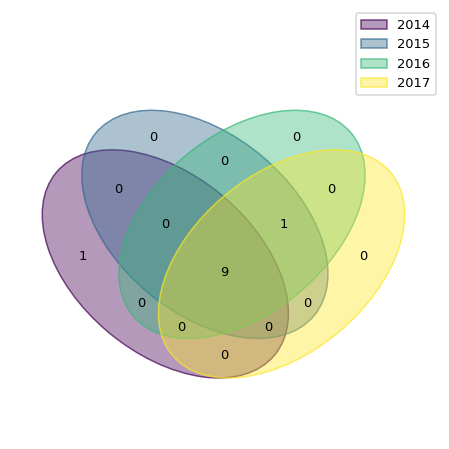

In [104]:
#venn top 10 most dangerous states in USA

from venn import venn
%matplotlib inline

states = {
    "2014": {'Hawaii',
 'Wyoming',
 'South Dakota',
 'North Dakota',
 'Maine',
 'Vermont',
 'Idaho',
 'New Hampshire',
 'Montana',
 'Alaska'},
    "2015": {'Vermont',
 'Wyoming',
 'Hawaii',
 'New Hampshire',
 'North Dakota',
 'South Dakota',
 'Maine',
 'Montana',
 'Idaho',
 'Rhode Island'},
    "2016": {'Vermont',
 'Wyoming',
 'Hawaii',
 'North Dakota',
 'Maine',
 'South Dakota',
 'New Hampshire',
 'Montana',
 'Idaho',
 'Rhode Island'},
    "2017": {'Vermont',
 'Wyoming',
 'Hawaii',
 'South Dakota',
 'North Dakota',
 'New Hampshire',
 'Maine',
 'Montana',
 'Idaho',
 'Rhode Island'}
}

venn(states)



In [165]:
#Filtrando os anos

df_gviol = groupby_year[(groupby_year["year"] > 2013) & (groupby_year["year"] < 2018)]
df_gviol.head()

,year,total_people
1,2014,35559
2,2015,40451
3,2016,45646
4,2017,46214


In [176]:
# Calculando mudança percentual do 'total de pessoas' em relação ao ano anterior

df_gviol['Percentage change'] = df_gviol["total_people"].pct_change()*100
df_pct_year = df_gviol.loc[df_gviol["year"] > 2014]
df_pct_year.replace([2015, 2016, 2017], ["2014-2015", "2015-2016","2016-2017"], inplace=True)
df_pct_year.rename(columns={'year': 'Interval'}, inplace=True)
df_pct_year.head()

/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Interval,total_people,Percentage change
2,2014-2015,40451,13.757417
3,2015-2016,45646,12.842699
4,2016-2017,46214,1.244359


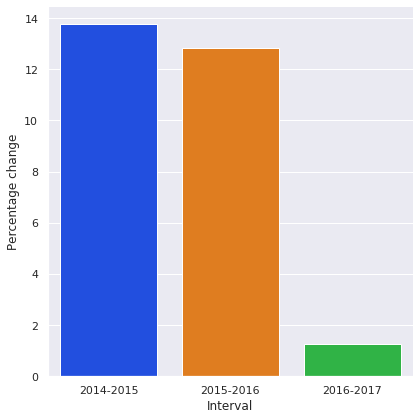

In [178]:
#PLotando o gŕafico das variações percentuais do total de pessoas por ano

sns.set_context("notebook")
test_group = sns.catplot(x="Interval", y="Percentage change", data=df_pct_year,
                height=6, kind="bar", palette="bright")